In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')

import dataset
import numbs
import backprop
import gp_backprop

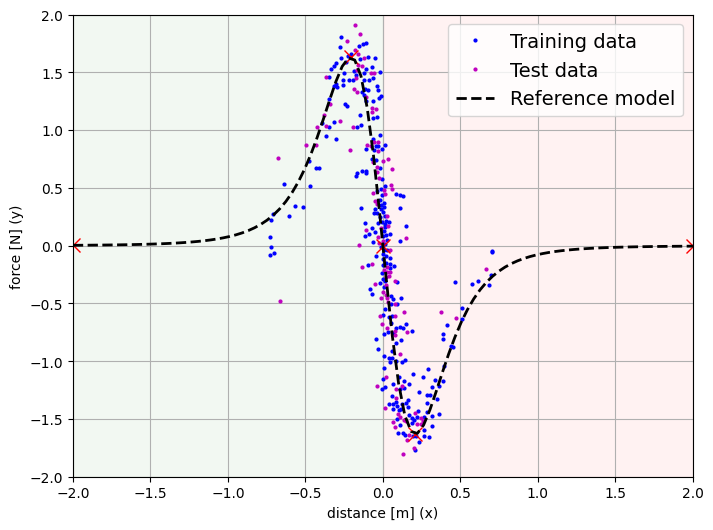

In [2]:
S = dataset.MagmanDatasetScaled()
#S.sample(size=250, noise=0.03, mesh=False)
S.load('../data/magman.csv')
S.split()
S.plot(width=8, height=6)

S.index()
numbs.init(S)

S_train = dataset.NumpyDataset(S)
S_test  = dataset.NumpyDataset(S, test=True)

In [3]:
population = gp_backprop.random_population(popsize=10, max_depth=2)
best_stree, best_eval = gp_backprop.evaluate(population, S_train, S_test)

(log(A(x)) * (B(x) * C(x)))

--- ASP Model ---
sign_unkn("A","+",-1,0) sign_unkn("A","+",-2,-1) sign_unkn("A","+",-3,-2) sign_unkn("A","+",-4,-3) sign_unkn("A","+",3,4) sign_unkn("A","+",2,3) sign_unkn("A","+",1,2) sign_unkn("A","+",0,1) sign_unkn("B","+",-4,-3) sign_unkn("B","+",-3,-2) sign_unkn("B","+",-2,-1) sign_unkn("B","+",-1,0) sign_unkn("B","+",0,1) sign_unkn("B","+",1,2) sign_unkn("B","+",2,3) sign_unkn("B","+",3,4) sign_unkn("C","-",-4,-3) sign_unkn("C","-",-3,-2) sign_unkn("C","-",-2,-1) sign_unkn("C","-",-1,0) sign_unkn("C","+",0,1) sign_unkn("C","+",1,2) sign_unkn("C","+",2,3) sign_unkn("C","+",3,4) sign_unkn("A'","+",1,2) sign_unkn("A'","+",2,3) sign_unkn("A'","+",3,4) sign_unkn("A'","-",-4,-3) sign_unkn("A'","-",-3,-2) sign_unkn("A'","-",-2,-1) sign_unkn("A'","+",0,1) sign_unkn("A'","-",-1,0) sign_unkn("B'","-",1,2) sign_unkn("B'","-",2,3) sign_unkn("B'","-",3,4) sign_unkn("B'","+",-4,-3) sign_unkn("B'","+",-3,-2) sign_unkn("B'","+",-2,-1) sign_unkn("B'","-",0,1) sign_un

--- Best Syntax Tree ---
((A(x) * B(x)) * exp(C(x)))
Training
	mse: 0.2529807908421918
	rmse: 0.5029719583060192
	r2: 0.7584494972325445
Testing
	mse: 0.3031661236400715
	rmse: 0.5506052339381379
	r2: 0.7149950193855861
Knowledge
	mse: 0.07308986364860458
	rmse: 0.27035137071708104



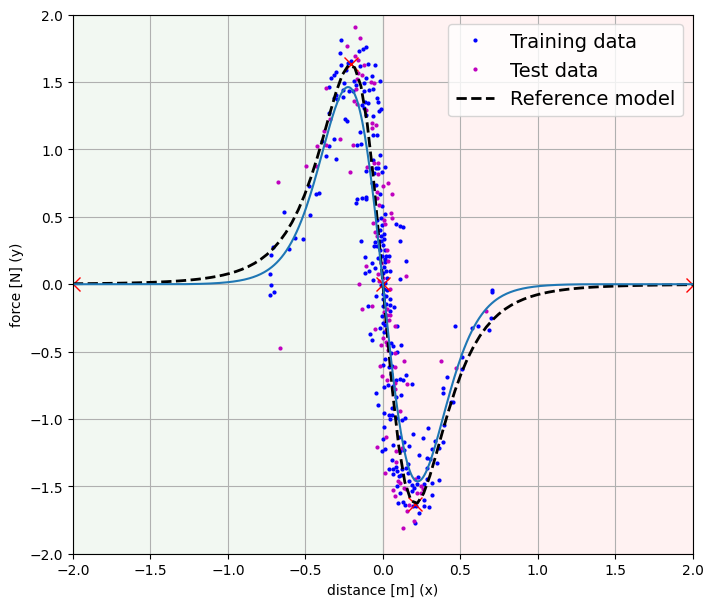

In [6]:
print("--- Best Syntax Tree ---")
print(best_stree)
print(best_eval)

if best_stree is not None:
    S.plot(width=8, height=7)
    xp = np.linspace(S.xl, S.xu, 500)
    plt.plot(xp, best_stree.compute_output(xp));
    plt.show()

In [5]:
if best_stree is not None:
    unkn_collector = backprop.UnknownSyntaxTreeCollector()
    best_stree.accept(unkn_collector)
    for unkn_label in unkn_collector.unknown_labels:
        print(f"{unkn_label}(x) =\n{best_stree.get_unknown_stree(unkn_label).model}\n")

C(x) =
        6         4         2
-1.905 x + 5.797 x - 10.46 x + 0.8169

B(x) =
           6            4           2
5.175e-07 x - 0.000106 x + 0.01296 x - 0.7539

A(x) =
           5           3
0.0001277 x - 0.04257 x + 6.385 x

